# Welcome to the Wine's quality prediction notebook!
In this notebook we will import a wine's quality dataset and we'll train a simple softmax model to predict the expected quality of a wine based on some of its features

### Make essential imports

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

ModuleNotFoundError: No module named 'sklearn'

## Explore dataset

### Import the wine's dataset

In [ ]:
df = pd.read_csv('winequality.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Visualize the data

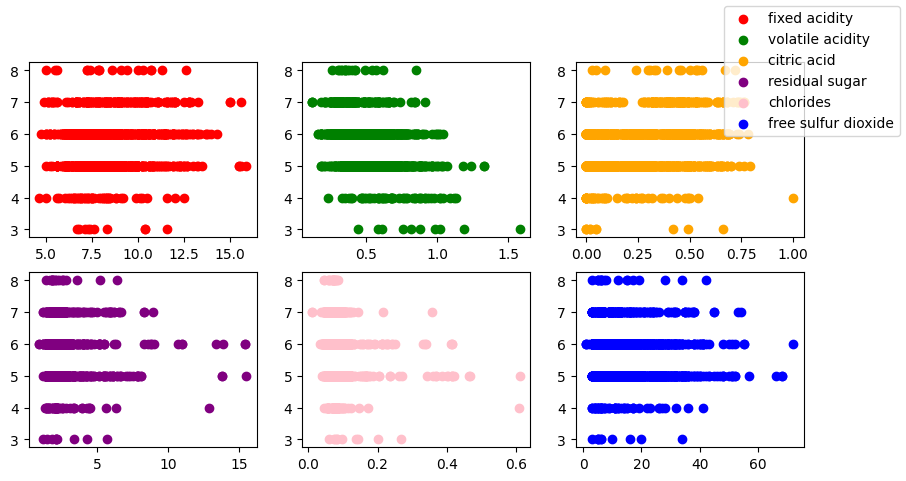

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(10, 5))
Y = df.quality.to_numpy()
features = [i for i in df.columns.to_list()]
del features[-1]
ax[0, 0].scatter(df[features[0]].to_numpy(), Y, color='red', label=features[0])
ax[0, 1].scatter(df[features[1]].to_numpy(), Y, color='green', label=features[1])
ax[0, 2].scatter(df[features[2]].to_numpy(), Y, color='orange', label=features[2])
ax[1, 0].scatter(df[features[3]].to_numpy(), Y, color='purple', label=features[3])
ax[1, 1].scatter(df[features[4]].to_numpy(), Y, color='pink', label=features[4])
ax[1, 2].scatter(df[features[5]].to_numpy(), Y, color='blue', label=features[5])
fig.legend()

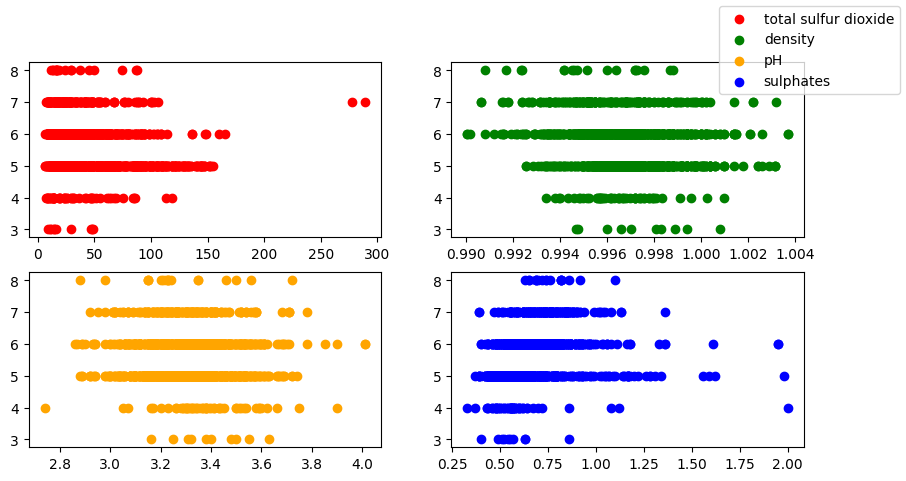

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0, 0].scatter(df[features[6]].to_numpy(), Y, color='red', label=features[6])
ax[0, 1].scatter(df[features[7]].to_numpy(), Y, color='green', label=features[7])
ax[1, 0].scatter(df[features[8]].to_numpy(), Y, color='orange', label=features[8])
ax[1, 1].scatter(df[features[9]].to_numpy(), Y, color='blue', label=features[9])
fig.legend()

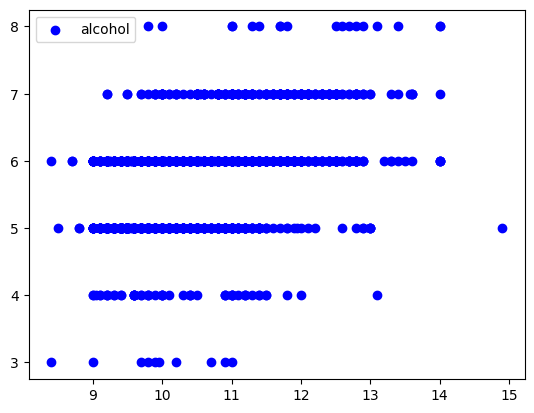

In [ ]:
plt.scatter(df[features[10]].to_numpy(), Y, color='blue', label=features[10])
plt.legend()
plt.show()

## Preprocess data and define model

### Create our X data
Being X data, every feature presented except the quality that'll be our label

In [ ]:
X = df[[i for i in features]].to_numpy()

In [ ]:
X.shape, Y.shape

((1599, 11), (1599,))

### Change the y labels to be between 0 and 6

In [ ]:
Y -= 3

### Using sklearn train_test_split we divide our data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42, shuffle=True)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1071, 11), (528, 11), (1071,), (528,))

### Create our tf.Variables to then perform gradient descent

In [ ]:
n_classes = 6

In [ ]:
w = tf.Variable(np.random.randn(6, X.shape[1])) #Initialize the weights randomly, as we are dealing with a softmax regression problem we have a set of w for each class
b = tf.Variable([np.zeros(6)], dtype='double')
w,b

(<tf.Variable 'Variable:0' shape=(6, 11) dtype=float64, numpy=
 array([[ 0.69420708,  0.44174424,  1.36662397, -0.49190665,  0.86388749,
         -0.4003628 ,  0.55829807, -1.56378797, -2.03035356,  2.04880851,
         -0.77766295],
        [-0.09447705,  0.15008899,  0.22290794,  1.69828124, -0.34242041,
          1.36978463,  0.36052308,  3.05045372,  0.64153051,  1.16567988,
          0.33856323],
        [ 0.04684491, -1.98277513, -0.33112958, -0.05439595,  0.38192286,
         -0.40823009,  0.05066299, -0.48542165, -0.17016035, -1.00515223,
          2.33951713],
        [-0.07590642, -0.45749197, -1.72612047, -0.41467435,  1.03417013,
          0.04189629,  0.57634269, -1.1519359 , -0.24874873, -0.19050318,
         -0.3025186 ],
        [ 1.15794026, -0.27260208,  1.2260798 ,  0.65129412, -0.37296443,
          0.58326614, -0.36266242,  1.35373939, -0.69968145, -0.5570072 ,
         -1.34662282],
        [ 0.67522904,  0.65894791,  1.01309389,  0.84302079,  1.0115    ,
        

## Train our weights and biases

In [ ]:
n_epochs = 10000
alpha = 0.001

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=alpha)
scce = tf.keras.losses.SparseCategoricalCrossentropy()
for i in range(n_epochs):
  with tf.GradientTape() as tape:
    y_pred = tf.nn.softmax(tf.transpose(tf.matmul(w, X_train.T)+tf.transpose(b)))
    cost = scce(y_train, y_pred)
  grads = tape.gradient(cost, [w, b])
  opt.apply_gradients(zip(grads, [w, b])) #Update w and b
  if not i%250:
    print(f"Loss epoch {i}: "+ str(tf.reduce_sum(cost))+ "\n")

Loss epoch 0: tf.Tensor(14.733767375903005, shape=(), dtype=float64)

Loss epoch 250: tf.Tensor(8.089710479463715, shape=(), dtype=float64)

Loss epoch 500: tf.Tensor(6.428597288843718, shape=(), dtype=float64)

Loss epoch 750: tf.Tensor(3.5428299939352548, shape=(), dtype=float64)

Loss epoch 1000: tf.Tensor(3.4273250657885286, shape=(), dtype=float64)

Loss epoch 1250: tf.Tensor(3.30522653844106, shape=(), dtype=float64)

Loss epoch 1500: tf.Tensor(3.1999924556791655, shape=(), dtype=float64)

Loss epoch 1750: tf.Tensor(3.0952615103936143, shape=(), dtype=float64)

Loss epoch 2000: tf.Tensor(3.0066797661771822, shape=(), dtype=float64)

Loss epoch 2250: tf.Tensor(2.9492064625395376, shape=(), dtype=float64)

Loss epoch 2500: tf.Tensor(2.9055524940628596, shape=(), dtype=float64)

Loss epoch 2750: tf.Tensor(2.86582044592412, shape=(), dtype=float64)

Loss epoch 3000: tf.Tensor(2.811089723250256, shape=(), dtype=float64)

Loss epoch 3250: tf.Tensor(2.753782024286178, shape=(), dtype=fl

## Evaluate performance of my model

### Compute the test loss

In [ ]:
y_pred = tf.nn.softmax(tf.transpose(tf.matmul(w, X_test.T)+tf.transpose(b)))
test_loss = scce(y_test, y_pred)
test_loss

<tf.Tensor: shape=(), dtype=float64, numpy=2.8532002802008747>

### Plot final results

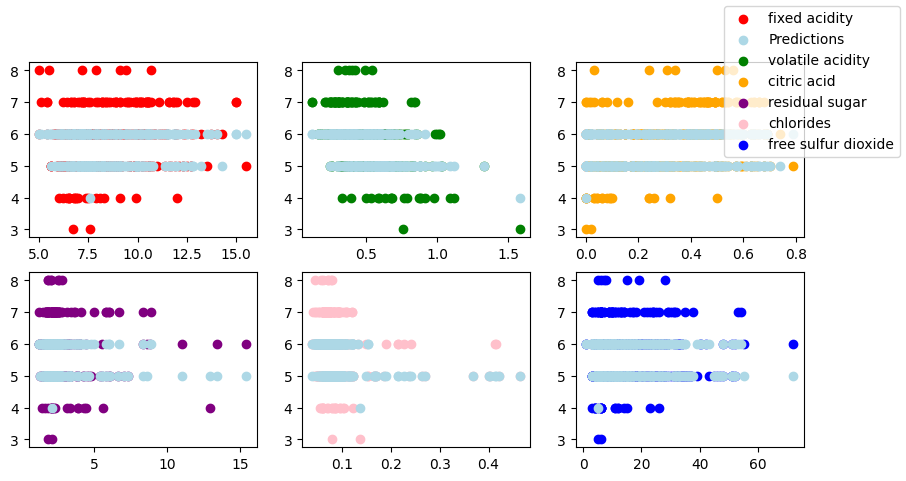

In [ ]:
y_plot_test = y_test+3 #Return labels to their original values to see actual quality of the wine
y_plot = tf.argmax(y_pred, axis=1)+3
fig, ax = plt.subplots(2, 3, figsize=(10, 5))

ax[0, 0].scatter(X_test[:,0], y_plot_test, color='red', label=features[0])
ax[0,0].scatter(X_test[:,0], y_plot, color='lightblue', label='Predictions')

ax[0, 1].scatter(X_test[:,1], y_plot_test, color='green', label=features[1])
ax[0,1].scatter(X_test[:,1], y_plot, color='lightblue')

ax[0, 2].scatter(X_test[:,2], y_plot_test, color='orange', label=features[2])
ax[0,2].scatter(X_test[:,2], y_plot, color='lightblue')

ax[1, 0].scatter(X_test[:,3], y_plot_test, color='purple', label=features[3])
ax[1,0].scatter(X_test[:,3], y_plot, color='lightblue')

ax[1, 1].scatter(X_test[:,4], y_plot_test, color='pink', label=features[4])
ax[1,1].scatter(X_test[:,4], y_plot, color='lightblue')

ax[1, 2].scatter(X_test[:,5], y_plot_test, color='blue', label=features[5])
ax[1,2].scatter(X_test[:,5], y_plot, color='lightblue')
fig.legend()

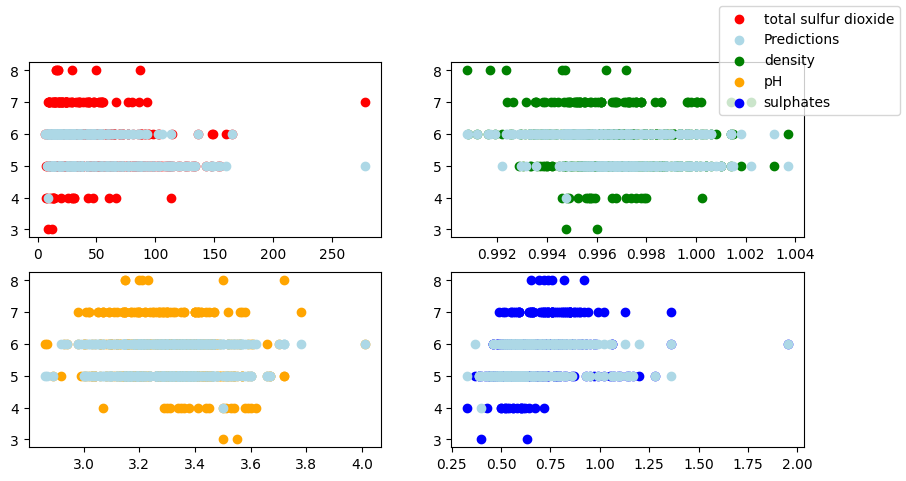

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))

ax[0, 0].scatter(X_test[:,6], y_plot_test, color='red', label=features[6])
ax[0,0].scatter(X_test[:,6], y_plot, color='lightblue', label='Predictions')

ax[0, 1].scatter(X_test[:,7], y_plot_test, color='green', label=features[7])
ax[0,1].scatter(X_test[:,7], y_plot, color='lightblue')

ax[1, 0].scatter(X_test[:,8], y_plot_test, color='orange', label=features[8])
ax[1,0].scatter(X_test[:,8], y_plot, color='lightblue')

ax[1, 1].scatter(X_test[:,9], y_plot_test, color='blue', label=features[9])
ax[1,1].scatter(X_test[:,9], y_plot, color='lightblue')
fig.legend()

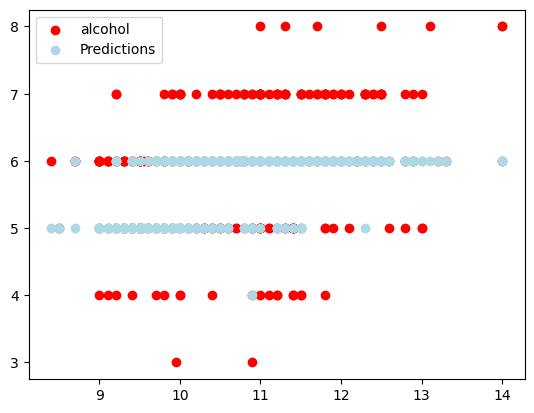

In [ ]:
plt.scatter(X_test[:,10], y_plot_test, color='red', label=features[10])
plt.scatter(X_test[:,10], y_plot, color='lightblue', label='Predictions')
plt.legend()
plt.show()

## Save parameters

### Save in pickle file

In [ ]:
weights = w.numpy()
biases = b.numpy()

# Create a dictionary to save the parameters
my_dict = {"w": weights, "b": biases}

# Save the dictionary to a file
with open("parameters", "wb") as f:
    pickle.dump(my_dict, f)

### Retrieve parameters from pickle file

In [ ]:
# Load the dictionary from the pickle file
with open("parameters", "rb") as f:
    loaded_dict = pickle.load(f)

# Test that the dictionary has been loaded
w, b = loaded_dict['w'], loaded_dict['b']
w, b

(array([[ 0.68762206,  0.44127647,  1.36640579, -0.49387305,  0.86364061,
         -0.3992275 ,  0.52093466, -1.56527838, -2.03512065,  2.04722761,
         -0.78882977],
        [-0.15025822,  2.87088528,  1.41338344,  0.42277118,  2.07251824,
          0.56711987,  0.40625827,  2.07920094,  0.09104302, -0.76470154,
          0.57630899],
        [ 0.07956885, -0.49806677, -0.85920327,  0.49673356,  2.92748099,
          0.54209164,  0.43212753,  1.51733158,  0.39378959, -1.21539736,
          0.49148926],
        [ 0.10598879, -3.06377406, -1.8693885 ,  0.48233967,  0.08029424,
          0.5737949 ,  0.410905  , -2.08714427,  0.05286028,  1.05341217,
          1.30322304],
        [ 1.11461995, -0.2742323 ,  1.2243071 ,  0.64631864, -0.37323049,
          0.5725556 , -0.38371724,  1.35013719, -0.71094234, -0.55927736,
         -1.38354791],
        [-0.1141151 , -3.03354661,  0.96703395,  0.3214458 , -7.74829085,
          0.60470296,  0.38247174, -4.16967351, -3.48452863,  4.4622366